## 1° Qual o Problema de Negócio
> Você foi contratado como Cientista de Dados da empresa e seu objetivo é construir uma Máquina Preditiva para prever o Preço de Venda dos carros da empresa.

> Esse processo de previsão vai automatizar e otimizar a definição dos preços dos carros que serão vendidos pelo App Instacarro.

https://www.instacarro.com/

In [1]:
# Importação dos Pacotes :
import pandas as pd     # importação do pacote pandas de manipulação de dados
import numpy as np      # pacote de funções matemáticas 
import seaborn as sns   # Gráficos
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt  # pacote de visualização de dados
%matplotlib inline

## 2º Entendendo o step by step
![](https://cienciadosdados.com/images/2022/05/pipeline.png)
[](https://cienciadosdados.com/images/2021/Design_sem_nome_10.png)

In [ ]:
# Ler o dataset :
df = pd.read_excel('/content/preco-carros.xlsx')
df

In [ ]:
#Instalação do Pacote
!pip install dataprep 

In [ ]:
# Relatório Automatizado
from dataprep.eda import create_report

create_report(df, title='Relatório de Veículos')

In [6]:
# Verificar as Variáveis (colunas-campos-features) :
df.columns

Index(['modelo', 'ano', 'preco_atu', 'preco_venda', 'kms_rodado',
       'combustivel', 'tipo_vendendor', 'transmissao', 'proprietario'],
      dtype='object')

In [7]:
# Escolher as Variáveis e salvar no dataset:
dataset = df[['ano', 'preco_venda', 'preco_atu', 'kms_rodado',
       'combustivel', 'tipo_vendendor', 'transmissao', 'proprietario']]

In [ ]:
# Visualizar o dataset
dataset.head()

In [9]:
# Criação de um campo com o ano corrente:
dataset['ano_atu'] = 2022

In [10]:
# Criar a nova coluna - Idade do carro 
dataset['idade'] = dataset['ano_atu']-dataset['ano']

In [11]:
# Visualizar o dataset
dataset.head()

,ano,preco_venda,preco_atu,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario,ano_atu,idade
0,2014,20883.90,34848.06,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,29611.50,59472.36,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,45196.50,61404.90,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,17766.90,25871.10,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,2867.64,42827.58,42450,Diesel,Dealer,Manual,0,2022,8


In [12]:
# Eliminar (dropar) as coolunas desnecessárias :
dataset.drop(['ano', 'ano_atu'],axis =1, inplace = True)

In [13]:
dataset.head()

,preco_venda,preco_atu,kms_rodado,combustivel,tipo_vendendor,transmissao,proprietario,idade
0,20883.90,34848.06,27000,Petrol,Dealer,Manual,0,8
1,29611.50,59472.36,43000,Diesel,Dealer,Manual,0,9
2,45196.50,61404.90,6900,Petrol,Dealer,Manual,0,5
3,17766.90,25871.10,5200,Petrol,Dealer,Manual,0,11
4,2867.64,42827.58,42450,Diesel,Dealer,Manual,0,8


In [14]:
# Transformar campos textuais em numéricos - OneHotCoding :
dataset = pd.get_dummies(dataset,drop_first = True)

In [15]:
dataset.head()

,preco_venda,preco_atu,kms_rodado,proprietario,idade,combustivel_Diesel,combustivel_Petrol,tipo_vendendor_Individual,transmissao_Manual
0,20883.90,34848.06,27000,0,8,0,1,0,1
1,29611.50,59472.36,43000,0,9,1,0,0,1
2,45196.50,61404.90,6900,0,5,0,1,0,1
3,17766.90,25871.10,5200,0,11,0,1,0,1
4,2867.64,42827.58,42450,0,8,1,0,0,1


In [16]:
# Separação das variáveis explicativa e o Target (variável que queremos prever) :
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [17]:
# Separação das amostras para treinamento e teste da Máquina Preditiva - Train Test Split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Campo não obrigatório, apenas uma curiosidade minha
#X_train
#X_test
#y_train
#y_test

In [20]:
# Utilização do Algoritmo RandomForestRegressor  para criação da Máquina Preditiva:
from sklearn.ensemble import RandomForestRegressor
MP_Aleatoria = RandomForestRegressor()

In [21]:
#Treinamento da MP com os dados de treino

MP_Aleatoria.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
# Teste da MP com novos Dados
predictions = MP_Aleatoria.predict(X_test)

In [ ]:
predictions

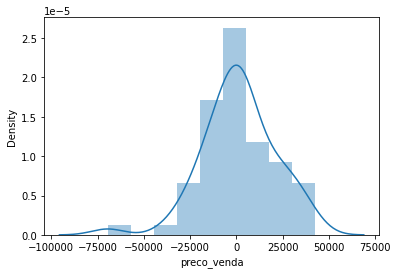

In [24]:
# Avaliação da Máquina Preditiva
sns.distplot(y_test-predictions)

In [25]:
# Salvamento da MP como arquivo "pkl"
import pickle
file = open('Random_forest_regression_model.pkl','wb')
pickle.dump(MP_Aleatoria,file)